# Derivadas y desarrollo en serie para el potencial electrostático
En este notebook vemos cómo calcular las derivadas que aparecen en el desarrollo en serie del potencial electrostático en coordenadas cartesianas, usando manipulación simbólica con SymPy. Pueden ver un tutorial básico de SymPy en https://docs.sympy.org/latest/tutorial/calculus.html, y un tutorial sobre cómo operar en forma simbólica con vectores en https://docs.sympy.org/latest/modules/vector/index.html. Comenzamos con código para que Sympy funcione automáticamente en Google colab, o en notebooks Jupyter si alguno de ustedes tiene Python y Jupyter instalado y decide ejecutarlo en sus computadoras. Recordar que cada celda a continuación debe ejecutarse en orden, apretando SHIFT+ENTER:

In [1]:
# El código en esta celda asegura que SymPy funcione correctamente en Google colab o en sus computadoras
import os
if "COLAB_GPU" in os.environ:
  from sympy import *
  def custom_latex_printer(expr, **options):
      from IPython.display import Math, HTML
      from google.colab.output._publish import javascript
      url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-AMS_CHTML"
      javascript(content="""window.MathJax = { tex2jax: { inlineMath: [ ['$','$'] ], processEscapes: true } };""")
      javascript(url=url)
      return latex(expr, **options)
  init_printing(use_latex="mathjax", latex_printer=custom_latex_printer)
else:
  from sympy import *
  init_printing()

## Derivadas espaciales del potencial en forma explícita
Usemos SymPy para calcular el gradiente del potencial electrostático para una carga puntual unitaria (q=1). Primero lo hacemos escribiendo al módulo en forma explícita en coordenadas cartesianas, y calculando la derivada en cada dirección espacial. Comenzamos definiendo símbolos para el potencial, las coordenadas espaciales (x,y,z), y las coordenadas espaciales primadas (x',y',z').

In [2]:
# Definimos variables simbólicas reales phi (para el potencial), x,y,z para las coordenadas, y x',y',z' para las coordenadas primadas
phi      = symbols("phi",     real=True)
x,y,z    = symbols("x y z",   real=True)
xp,yp,zp = symbols("x' y' z'",real=True)

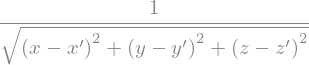

In [3]:
# Definimos el potencial y lo imprimimos
phi = 1/(sqrt((x-xp)**2+(y-yp)**2+(z-zp)**2))
phi

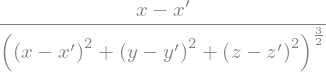

In [4]:
# Calculamos la derivada del potencial respecto a x'. Prueben derivar respecto a y' (yp) o z' (zp).
diff(phi, xp)

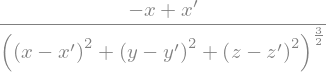

In [5]:
# Calculamos la derivada del potencial respecto a x; notar que es igual a menos la derivada respecto a x'.
diff(phi, x)

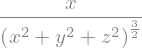

In [6]:
# Calculamos la derivada del potencial respecto a x', y lo evaluamos en x'=y'=z'=0 usando "subs"
diff(phi, xp).subs(xp,0).subs(yp,0).subs(zp,0)

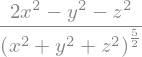

In [7]:
# Finalmente, calculamos la derivada segunda (prueben cambiar las coordenadas en las derivadas), y lo evaluamos en x'=y'=z'=0
simplify(diff(diff(phi, xp), xp).subs(xp,0).subs(yp,0).subs(zp,0))

## Derivadas del potencial usando notación vectorial
Ahora podemos volver a calcular las derivadas, pero usando el módulo para cálculo vectorial en SymPy. Usamos un sistema de coordenadas para las coordenadas primadas, de forma tal que los operadores diferenciales nabla, gradiente, rotor y divergencia se calculen respecto a esas coordenadas.

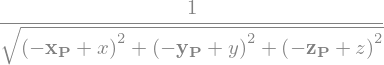

In [8]:
# Importamos el módulo para cálculo vectorial
from sympy.vector import *

# Definimos un sistema de coordenadas cartesiano. P.i,P.j,P.k van a ser los 3 versores, y P.x,P.y,Pz las tres coordenadas primadas
P = CoordSys3D('P')

# Definimos el potencial electrostático para una carga puntual unitaria (q=1)
phi = 1/sqrt((x-P.x)**2+(y-P.y)**2+(z-P.z)**2)
phi

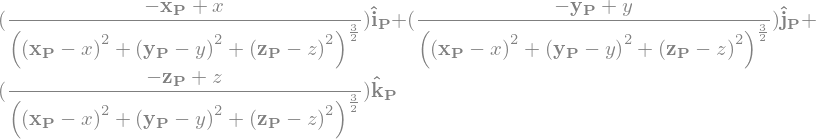

In [9]:
# Calculamos el gradiente del potencial
simplify(gradient(phi))

In [10]:
# Veamos que el rotor del gradiente que calculamos es cero
simplify(curl(_))

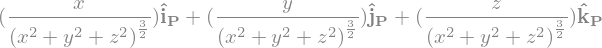

In [11]:
# Finalmente, calculamos el gradiente del potencial y lo evaluamos en x'=y'=z'=0
simplify(gradient(phi)).subs(P.x,0).subs(P.y,0).subs(P.z,0)